In [2]:
import numpy as np
import scipy.optimize as resol
import scipy.integrate as integr
import matplotlib.pyplot as plt

In [3]:
a, b, I, tau = 0.95, 0.4, 0.59, 11

# Première approche du problème

## Solution avec les méthodes Python du problème sans stimulation 

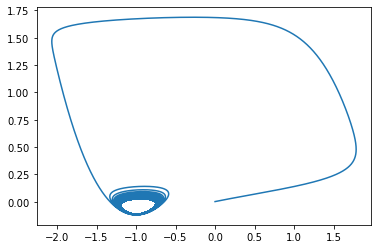

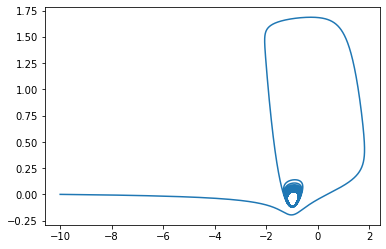

In [7]:
I = 0.5901
def A(y,t):
    return np.array([y[0]-y[0]**3/3 - y[1] + I, (y[0] + a -b*y[1])/tau])
    
T = np.arange(0,10000,0.01)
X = integr.odeint(A, np.array([0,0]), T)


plt.plot(X[ :,0], X[ :,1])
plt.show()

T = np.arange(0,10000,0.01)
X = integr.odeint(A, np.array([-10,0]), T)

plt.plot(X[ :,0], X[ :,1])
plt.show()

### Quand on se rapproche du point d'équilibre

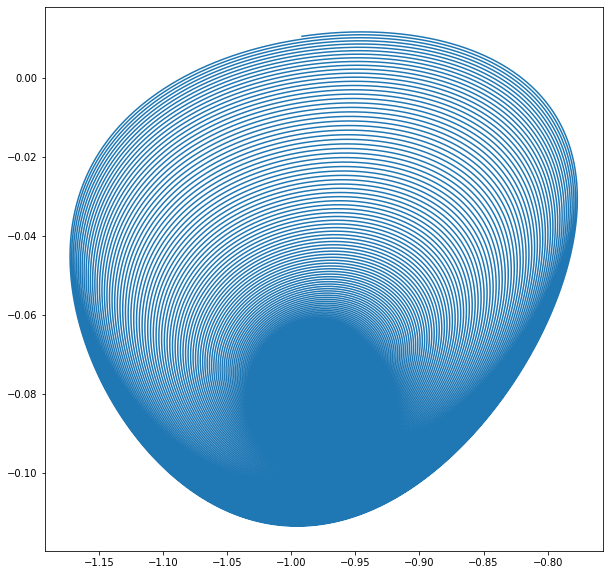

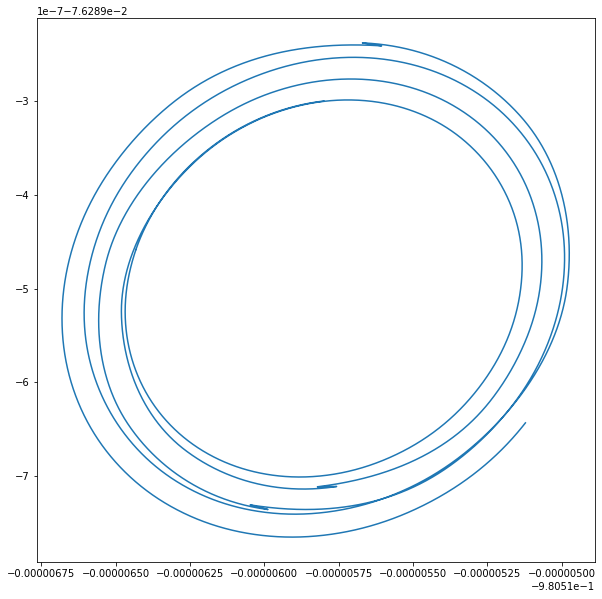

In [55]:
T = np.arange(0,10000,0.01)
X = integr.odeint(A, np.array([-0.9805158,-0.0762893]), T)


plt.figure(figsize=(10,10))
plt.plot(X[ :,0], X[ :,1])
plt.show()

T = np.arange(0,100,0.01)
X = integr.odeint(A, np.array([-0.9805158,-0.0762893]), T)

plt.figure(figsize=(10,10))
plt.plot(X[ :,0], X[ :,1])
plt.show()

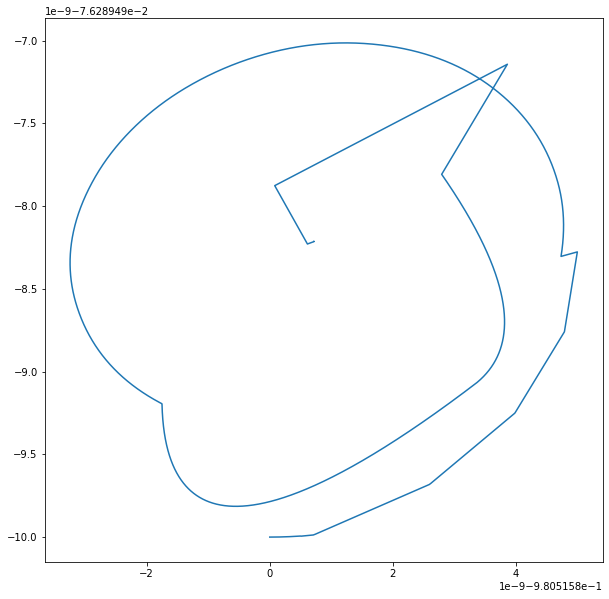

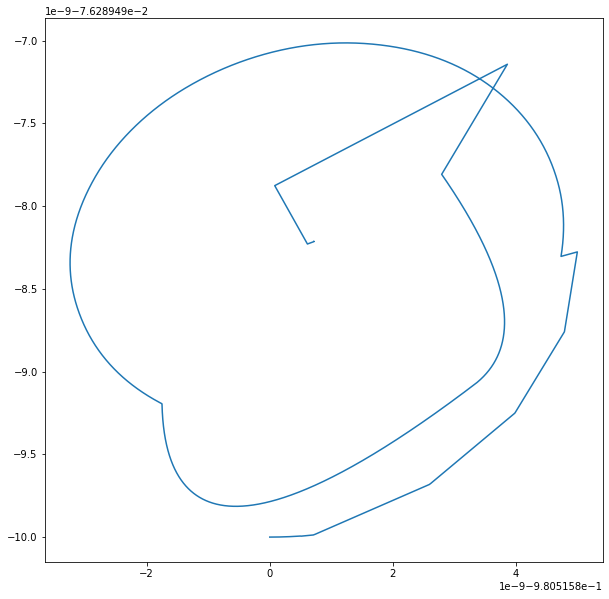

In [23]:
T = np.arange(0,10000,0.01)
X = integr.odeint(A, np.array([-0.9805158,-0.0762895]), T)


plt.figure(figsize=(10,10))
plt.plot(X[ :,0], X[ :,1])
plt.show()

T = np.arange(0,1000,0.01)
X = integr.odeint(A, np.array([-0.9805158,-0.0762895]), T)

plt.figure(figsize=(10,10))
plt.plot(X[ :,0], X[ :,1])
plt.show()

# Solution avec les méthodes Python du problème avec stimulation 

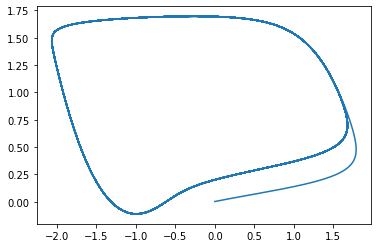

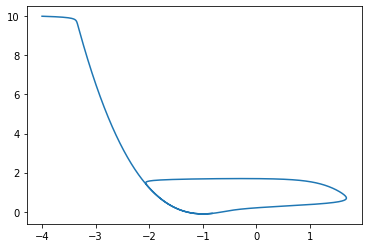

In [6]:
I = 0.60
T = np.arange(0,1000,0.01)
X = integr.odeint(A, np.array([0,0]), T)

plt.plot(X[ :,0], X[ :,1])
plt.show()

T = np.arange(0,100,0.01)
X = integr.odeint(A, np.array([-4,10]), T)


plt.plot(X[ :,0], X[ :,1])
plt.show()

# Implémentation Méthode Euler Explicite

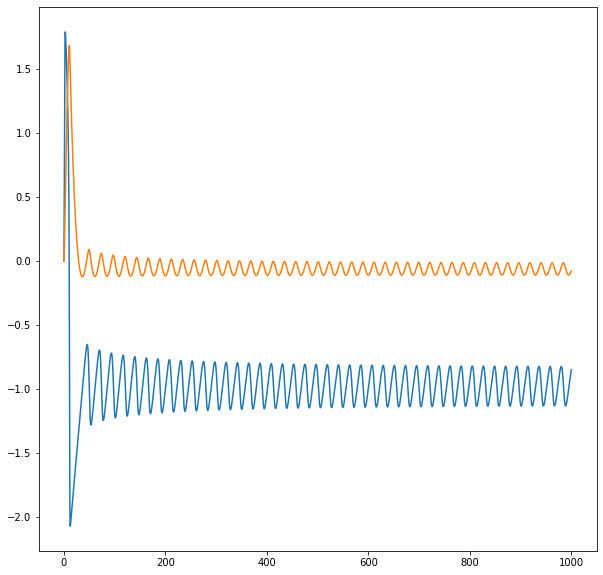

In [38]:
def dervv(v,w):
    return v - v**3/3 -w + I

def dervw(v,w):
    return (v + a - b*w)/tau

def euler_explicite(v0, w0, tmin, tmax, h):
    t = [0]
    v = [v0]
    w = [w0]
    tk = tmin
    dv = v0
    dw = w0
    while tk<=tmax:
        tk+=h
        t.append(tk)
        dv+=dervv(dv,dw)*h
        dw+=dervw(dv,dw)*h
        v.append(dv)
        w.append(dw)
        
    return t, v, w
 
I = 0.59
t,v,w = euler_explicite(0,0, 0, 1000,0.1)
#plt.plot(v,w)
#plt.show()
plt.figure(figsize=(10,10))
plt.plot(t,v)
plt.plot(t,w)
plt.show()

# Implémentation Méthode euler implicite

Je n'ai pas réussi à l'implémenter correctement

In [8]:
def euler_implicite(v0, w0, tmin, tmax, h):
    t = [0]
    v = [v0]
    w = [w0]
    tk = tmin
    dv = v0
    dw = w0
    while tk<=tmax:
        tk+=h
        t.append(tk)
        dv+=dervv(dv,dw)*h
        dw+=dervw(dv,dw)*h
        v.append(dv)
        w.append(dw)
        
    return t, v, w

# Implémentation méthodes numériques

In [9]:
def fonct(y, t, a, b, I, tau):
    return np.array([y[0] - y[0]**3/3 - y[1] + I, (y[0] + a - b*y[1])/tau])


def rungekutta1(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        y[i+1] = y[i] + (t[i+1] - t[i]) * f(y[i], t[i], *args)
    return y

def rungekutta2(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        y[i+1] = y[i] + h * f(y[i] + f(y[i], t[i], *args) * h / 2., t[i] + h / 2., *args)
    return y

def rungekutta4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2., t[i] + h / 2., *args)
        k3 = f(y[i] + k2 * h / 2., t[i] + h / 2., *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i+1] = y[i] + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
    return y

## Test RungeKutta 1

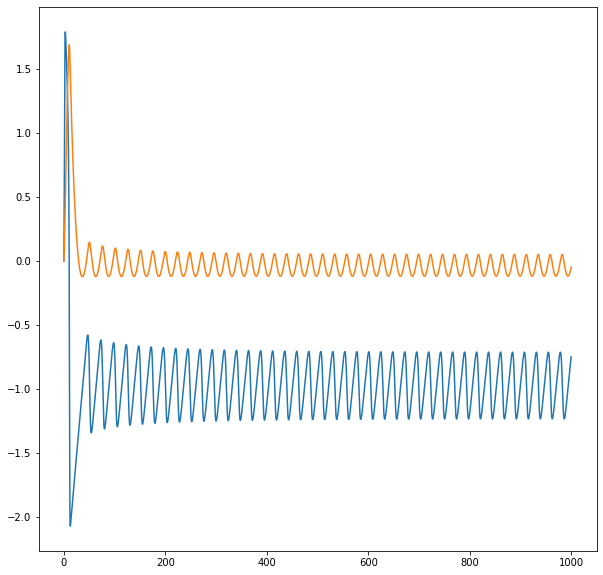

In [10]:
t = np.linspace(0,1000,100000)
y1 = rungekutta1(fonct, [0,0], t,  args = (0.95, 0.4, 0.59, 11))
plt.figure(figsize = (10,10))
plt.plot(t, y1[:,0])
plt.plot(t, y1[:,1])
plt.show()

## Test RungeKutta 2

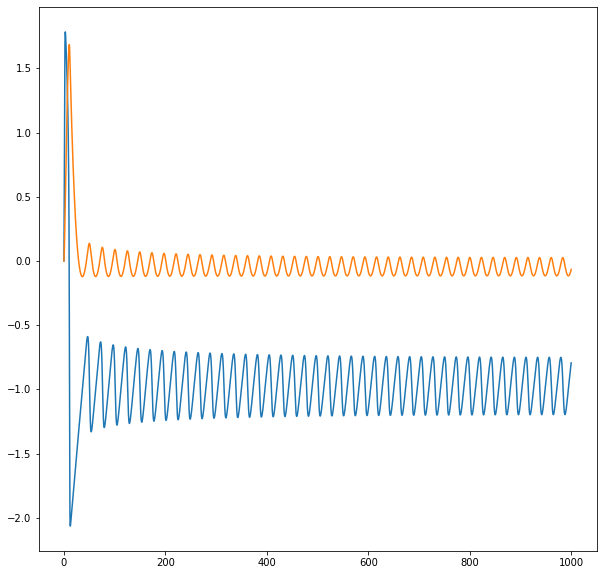

In [11]:
t = np.linspace(0,1000,10000)
y2 = rungekutta2(fonct, [0,0], t,  args = (0.95, 0.4, 0.59, 11))
plt.figure(figsize = (10,10))
plt.plot(t, y2[:,0])
plt.plot(t, y2[:,1])
plt.show()

# Test RungeKutta 4

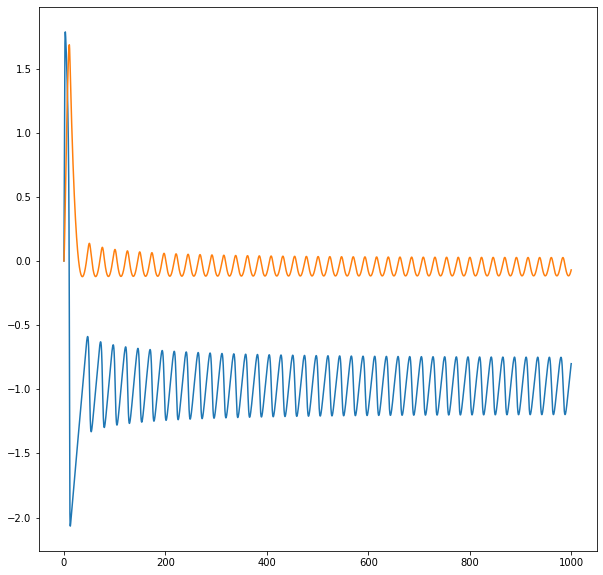

In [40]:
t = np.linspace(0,1000,10000)
y2 = rungekutta4(fonct, [0,0], t,  args = (0.95, 0.4, 0.59, 11))
plt.figure(figsize = (10,10))
plt.plot(t, y2[:,0])
plt.plot(t, y2[:,1])
plt.show()

# Recherche d'un point d'équilibre

In [13]:
def f1(v):
    return (v+a)/b

def f2(v):
    return I + v - v**3/3

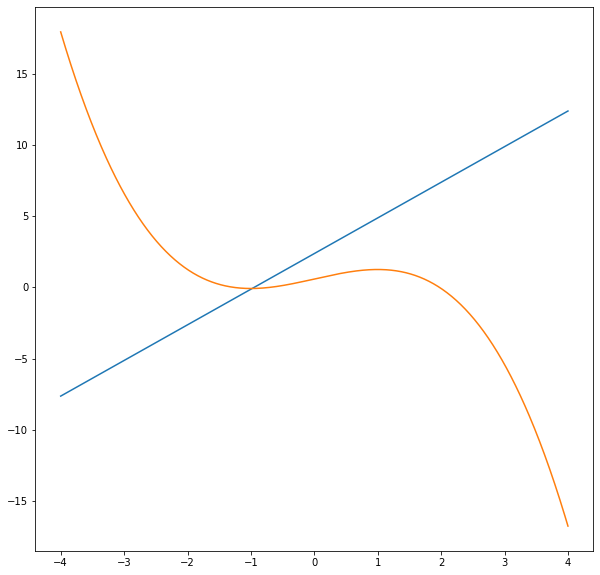

In [14]:
plt.figure(figsize=(10,10))

x = np.linspace(-4,4,1000)
plt.plot(x, f1(x))
plt.plot(x, f2(x))
plt.show()

#On peut tracer v par rapport w pour voir ce que ça donne 

### Autres Tests

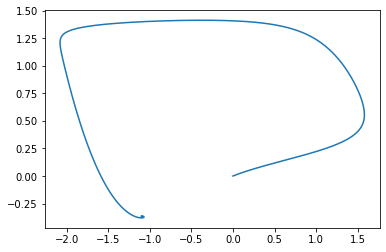

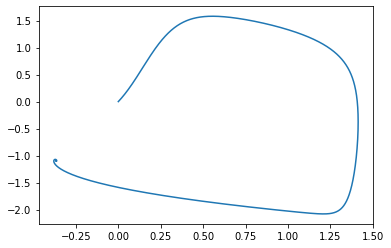

In [15]:
I = 0.29
t,v,w = euler_explicite(0,0, 0, 300,0.01)
plt.plot(v,w)
plt.show()
plt.plot(w,v)
plt.show()
#pt d'équilibre -1.0968,-0.366995

### A classer

In [16]:
def euler(F, t0,tf,y0, n):
    """Données:
    F(y,t) une fonction
    t0,t1 deux réels avec t0 < t1
    y0 un réel
    n un entier
    Résultat: le tuple constitué de la liste des temps [t0,...,tn] et la liste des (n+1) réels [y_0, ...y_n]
    qui constituent une approximation de la solution y sur [t0,tf]
    de l’ED y’=F(y,t) avec la condition initiale y(t0) = y0
    """
    h = (tf-t0)/n
    y = y0
    t = t0
    Y = [y0]
    T = [t0]
    for k in range(n): # n itérations donc n+1 points
        y = y + h*F(y,t)
        t = t + h
        Y.append(y)
        T.append(t)
    return T,Y

In [17]:
def test(Y):
    return np.array([[1-Y[0]**2/3,-1],[1/tau, -b/tau]])

def F(v0,w0,n):
    c = np.array([I,a/tau])
    Y = np.zeros((n,2))
    Y[0] =  np.array([v0,w0])
    for i in range(n-1):
        Y[i+1] = Y[i] + (test(Y[i]) @ Y[i] + c)/n
    return Y

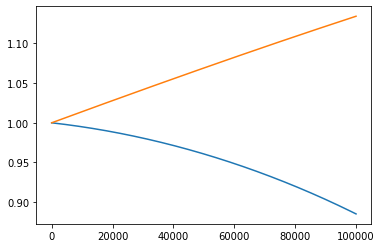

In [18]:
Y = F(1,1,100000)
plt.plot(Y[:,0])
plt.plot(Y[:,1])
plt.show()

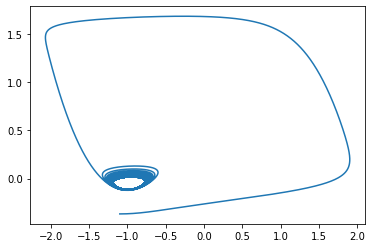

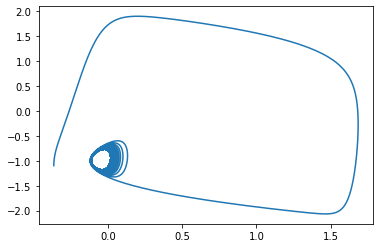

In [19]:
I = 0.59
t,v2,w2 = euler_explicite(v[-1],w[-1], 0, 10600,0.01)
plt.plot(v2,w2)
plt.show()
plt.plot(w2,v2)
plt.show()